In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import os
for dirname, _, filenames in os.walk('/kaggle/input/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Reading the files
* In Machine Learning, we separate our dataset into two parts, the training dataset 'train_df' and the testing dataset 'test_df'. Each dataset serves a specific purpose in the model development process.

* The training dataset is used to train the machine learning model. It contains a labeled set of data, where the target variable (the variable we want to predict) is provided along with the input features (independent variables).

* The testing dataset is used to evaluate the perfomrance of the trained model on unseen data.

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df  = pd.read_csv("/kaggle/input/titanic/test.csv")

Display the DataFrame using .info() function. The method provides a consicse summary of the DataFrame's structure, including the number of non-null values, data types, and memoory usage.

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Describing the data using the .describe() method. It generates a summary of descriptive statistics for the numerical columns in the DataFrame.

**Descrition of the features:**
survival:    Survival 
PassengerId: Unique Id of a passenger. 
pclass:    Ticket class     
sex:    Sex     
Age:    Age in years     
sibsp:    # of siblings / spouses aboard the Titanic     
parch:    # of parents / children aboard the Titanic     
ticket:    Ticket number     
fare:    Passenger fare     
cabin:    Cabin number     
embarked:    Port of Embarkation

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Display first 8 rows

In [5]:
train_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


# Find out what data is missing
Generate a summary of the total number of missing values and the percentage of missing values for the top 5 columns with the highest number of missing values.

In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


Retreive the names of the columns in a DataFrame as a NumPy array, returning an array containing the column names of the DataFrame in the same order they appear in the DataFrame.

In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

# Visualising Data by Age and Sex

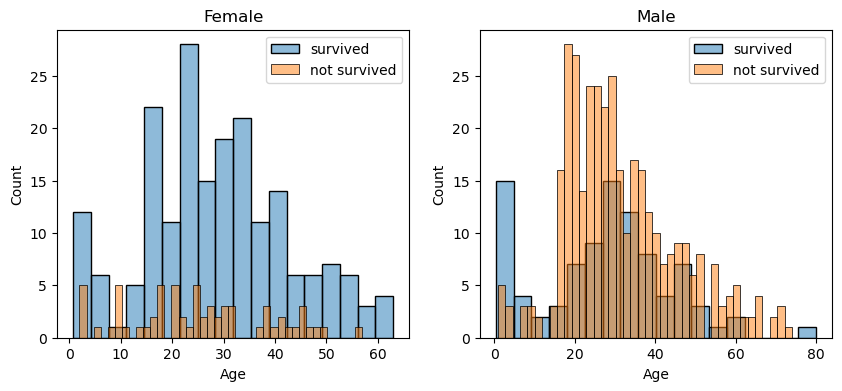

In [8]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, alpha=0.5)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, alpha=0.5)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, alpha=0.5)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, alpha=0.5)
ax.legend()
_ = ax.set_title('Male')

**Result:**
Certain age ranges have increased odds of survival.

# Visualising based on Embarked, Pclass and sex

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


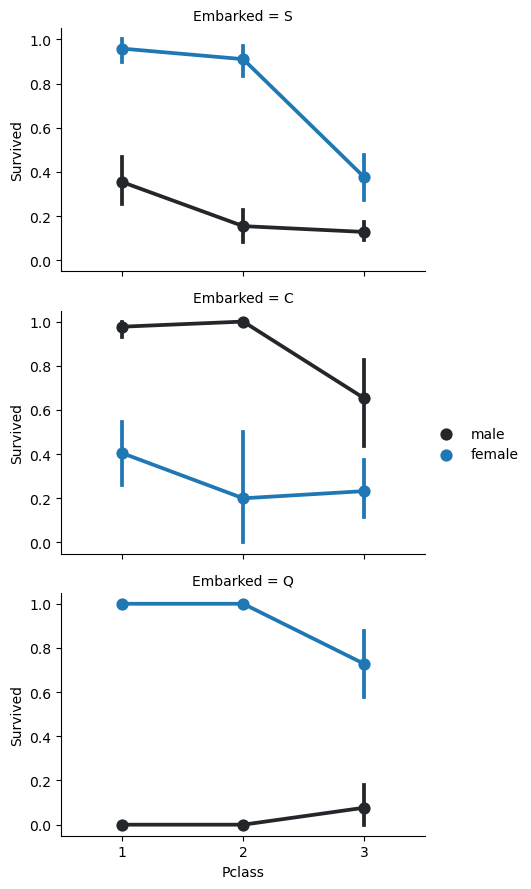

In [9]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=3, aspect=1.5)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**Results:** Females have a higher chance of survival if they embarked on S or Q, but men have a higher chance of survival if they embakred at port C. Pclass also has a correlation which we will plot another graph below.

# Visualising relationship between Pclass and Survival rate

<Axes: xlabel='Pclass', ylabel='Survived'>

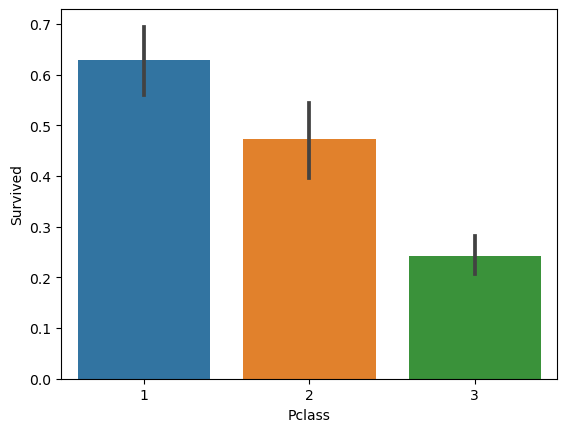

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

**Results:** Pclass 1 has the highest survival rate and Pclass 3 has the lowest survival rate. We will create another Pclass plot below.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


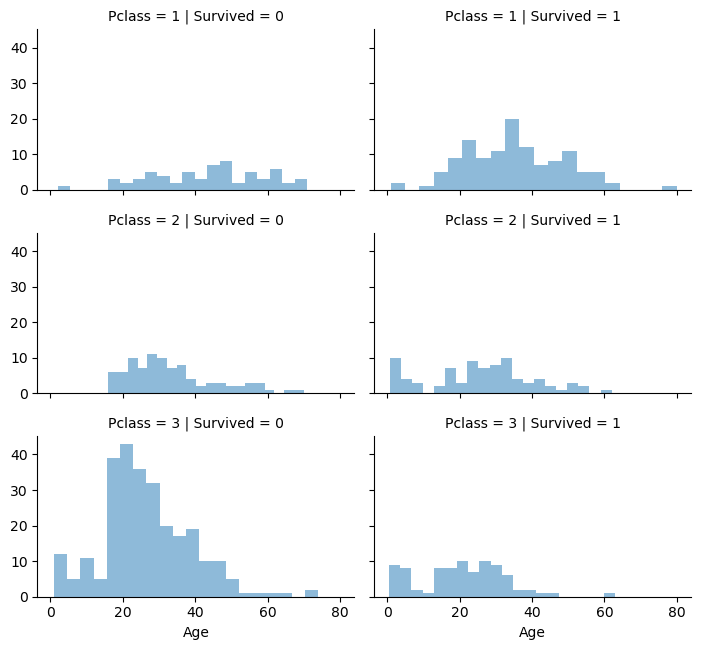

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

**Results:** This plot confirms that Pclass 1 has the highest survival rate and Pclass 3 has the lowest survival rate.

# SibSp and Parch
Combining SibSp and Parch to a feature that makes more sense. We will create it as 'not_alone' to show if someone is alone or not.

In [12]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

**Results:** We can see that there are 354 passengers who were alone.

<Axes: xlabel='relatives', ylabel='Survived'>

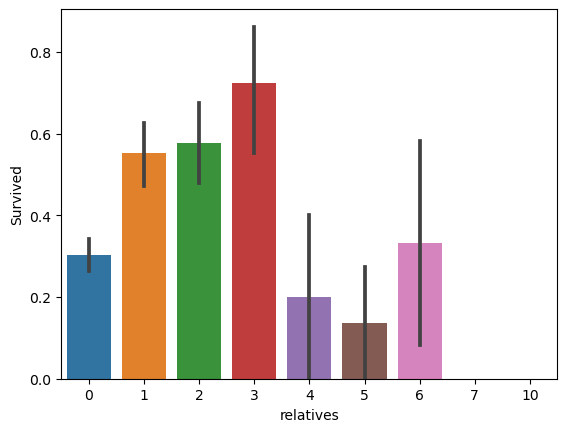

In [13]:
sns.barplot(x='relatives', y='Survived', data=train_df)

**Results:** We can see that there is a high probability of survival with 1 to 3 relatives but a lower probability if you have 0 or more than 3, with the exception of 6.

# Data Preprocessing
Data preprocessing is a crucial step. It refers to the process of cleaning, transformating and organising raw data into a format suitable for data analysis or training machine learning models. The goal is to ensure that the data is accurate, complete, and relevant for the indened analysis or modeling task.

**1. Irrelevant Data:** We will drop PassengerId from the train set as it does not contribute to a person's surival probability.

In [14]:
if 'PassengerId' in train_df.columns:
    # Drop the 'PassengerId' column
    train_df = train_df.drop(['PassengerId'], axis=1)
    print("'PassengerId' column dropped.")
else:
    print("'PassengerId' column not found in the DataFrame.")

'PassengerId' column dropped.


**2. Missing data:** Analysing Cabin data and transforming it to Deck, a numerical value.

In [15]:
# Print the first 100 unique values of Cabin
print(train_df['Cabin'].unique()[:100])

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101']


The cabin values looks like 'A14' 'B37' 'C30' and the first letters resemble the decks present on the titanic ranging from A to G. We will extract these and create a new feature that contains a person's deck and afterwards we will convert the feature into a numeric variable. For the null values in the Cabin, we will fill it with "U0", and it will have a value of 8.

Link to decks on the titanic: https://www.dummies.com/article/academics-the-arts/history/20th-century/titanic-facts-the-layout-of-the-ship-180759/

Things to note: In the Cabin column, there is actually a row with value 'T' which caused a null value to appear once in Deck after the conversion. Since T value only appears once in the dataset, and it is not an actual deck on the Titanic, I decided to convert all null values in Deck to '8' to match the other null values in Cabin.

Here is what I did to track that 'T' value. I printed the number of null values in Cabin and Deck after the conversion. Then displayed the row with null value in Deck as follows:
> print(train_df['Cabin'].isna().sum())

> print(train_df['Deck'].isna().sum())

> print(train_df[train_df['Deck'].isna()].iloc[0])

In [16]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(8)
    dataset['Deck'] = dataset['Deck'].astype(int)

# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

# Print the occurance for each unique values of Cabin
print(train_df['Deck'].value_counts().sort_index().head(10))

1     15
2     47
3     59
4     33
5     32
6     13
7      4
8    688
Name: Deck, dtype: int64


**3. Missing data:** Missing Age values using an array that contains random numbers, computed based on the mean age value in regards to the standard deviation and is_null.

In [17]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

0

**3. Missing data:** Since Embarked only has 2 missing values, we will just fill it with the most common one.

In [18]:
train_df['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [19]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

# Converting Features

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int64  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int64  
 12  Deck       891 non-null    int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 90.6+ KB


We can see that 'Fare' is a float and we have to deal with 4 objects Name, Sex, Ticket, and Embarked.

**1. Converting features:** Converting 'Fare' from float to int64

In [21]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**2. Converting features:** Extracting the titles from 'Name' and mapping it to a value for a new feature 'Title'

In [22]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

print(train_df['Title'].value_counts().sort_index().head(10))

1    517
2    185
3    126
4     40
5     23
Name: Title, dtype: int64


**3. Converting features:** Convert sex to numerical value

In [23]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)
    
print(train_df['Sex'].value_counts().sort_index().head(10))

0    577
1    314
Name: Sex, dtype: int64


**4. Converting features:** Tickets. Since there are 681 unique tickets, we will just drop it from the dataset.

In [24]:
train_df['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

Dropping ticket

In [25]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

**5. Converting features:** Convert Embarked to a numerical value


In [26]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

# Creating Categories

Creating categories within the features

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Survived   891 non-null    int64
 1   Pclass     891 non-null    int64
 2   Sex        891 non-null    int64
 3   Age        891 non-null    int64
 4   SibSp      891 non-null    int64
 5   Parch      891 non-null    int64
 6   Fare       891 non-null    int64
 7   Embarked   891 non-null    int64
 8   relatives  891 non-null    int64
 9   not_alone  891 non-null    int64
 10  Deck       891 non-null    int64
 11  Title      891 non-null    int64
dtypes: int64(12)
memory usage: 83.7 KB


**1. Creating Categories:** Converting the 'Age' feature to 'AgeGroup' variable.

In [28]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

4    169
6    159
5    154
3    139
2    115
1     87
0     68
Name: Age, dtype: int64

In [29]:
train_df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,7,0,1,0,8,1
1,1,1,1,5,1,0,71,1,1,0,3,3
2,1,3,1,3,0,0,7,0,0,1,8,2
3,1,1,1,5,1,0,53,0,1,0,3,3
4,0,3,0,5,0,0,8,0,0,1,8,1
5,0,3,0,1,0,0,8,2,0,1,8,1
6,0,1,0,6,0,0,51,0,0,1,5,1
7,0,3,0,0,3,1,21,0,4,0,8,4
8,1,3,1,3,0,2,11,0,2,0,8,3
9,1,2,1,1,1,0,30,1,1,0,8,3


**2. Creating Categories:** Converting the 'Fare' feature to 'FareGroup' variable.

In [30]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [31]:
train_df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,0,2,1,0,0,0,1,0,8,1
1,1,1,1,5,1,0,3,1,1,0,3,3
2,1,3,1,3,0,0,0,0,0,1,8,2
3,1,1,1,5,1,0,3,0,1,0,3,3
4,0,3,0,5,0,0,1,0,0,1,8,1
5,0,3,0,1,0,0,1,2,0,1,8,1
6,0,1,0,6,0,0,3,0,0,1,5,1
7,0,3,0,0,3,1,2,0,4,0,8,4
8,1,3,1,3,0,2,1,0,2,0,8,3
9,1,2,1,1,1,0,2,1,1,0,8,3


# Creating new Features

**1. Age times Class**

In [32]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

**2. Fare per Person**

In [33]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
# Let's take a last look at the training set, before we start training the models.
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,0,1,0,0,1,2,0,1,8,1,3,1
6,0,1,0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,1,1,1,0,2,1,1,0,8,3,2,1


# Building the Machine Learning Models

Here we create the 'X_train' training feature set by dropping the 'Survived' column  from the original 'train_df' DataFrame. The 'Survived' column is the target variable, the outcome we want to predict. In Machine Learning, it's common to separate the features(input variables) from the target variable so the model can learn from the features to predict the target.

We create the 'Y_train' training target set by extracting the 'Survive column'. This column contains the labels corresponding to each row in the training data. It represents whether a passenger survived(1) or not(0).

We create the 'X_test' testing feature set using the 'test_df' DataFrame. Similar to train_df, we drop the 'PassengerId' column since it is not a feature used for prediction. We create a copy of the resulting DataFrame to avoid potential data leakage.

In [34]:
X_train = train_df.drop("Survived", axis=1) 
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

# Stochastic Gradient Descent (SGD)
Stochastic Gradient Descent is an optimization algorithm commonly used to train linear classifiers like the 'SGDClassifier' in scikit-learn. It is a variant of gradient descent, a first-order iterative optimization algorithm for finding the minimum of a function.

In [35]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

* sgd = linear_model.SGDClassifier(max_iter=5, tol=None): Here, we create an instance of the SGDClassifier with the specified hyperparameters. max_iter=5 indicates that the algorithm will run for a maximum of 5 epochs (iterations) through the entire dataset. The tol=None parameter sets the tolerance for stopping criteria, and if set to None, the training will run for the specified maximum number of iterations.

* sgd.fit(X_train, Y_train): This line trains the SGDClassifier on the training data X_train with the corresponding target labels Y_train. The algorithm learns the optimal weights for the linear classifier to make predictions based on the features.

* Y_pred = sgd.predict(X_test): After training the classifier, we use it to make predictions on the testing data X_test. The predicted labels are stored in Y_pred.

* sgd.score(X_train, Y_train): This line computes the accuracy of the trained classifier on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

* acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2): Finally, the accuracy score obtained in the previous step is rounded to two decimal places and stored in the variable acc_sgd.

# Random Forest
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to make more accurate and robust classifications. It helps reduce overfitting and provides better generalization performance compared to individual decision trees.

In [36]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

* random_forest = RandomForestClassifier(n_estimators=100): Here, we create an instance of the RandomForestClassifier class with n_estimators=100. The n_estimators parameter specifies the number of decision trees that will be used to build the random forest. In this case, we are using 100 decision trees.

* random_forest.fit(X_train, Y_train): This line trains the Random Forest classifier on the training data X_train with the corresponding target labels Y_train. The algorithm builds multiple decision trees, each using a random subset of features and data points to make predictions.

* Y_prediction = random_forest.predict(X_test): After training the classifier, we use it to make predictions on the testing data X_test. The predicted labels are stored in Y_prediction.

* random_forest.score(X_train, Y_train): This line computes the accuracy of the trained Random Forest classifier on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

* acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2): Finally, the accuracy score obtained in the previous step is rounded to two decimal places and stored in the variable acc_random_forest.

# Logistic Regression
Logistic Regression is a statistical method used for binary classification tasks, where the goal is to predict one of two possible outcomes. It is a linear classification algorithm that works by modeling the relationship between the input features (independent variables) and the binary output (dependent variable) using the logistic function. The logistic function maps the predicted values to the range [0, 1], representing the probability of the positive class. If the probability is greater than or equal to a specified threshold (usually 0.5), the sample is classified as the positive class; otherwise, it is classified as the negative class. In the context of machine learning, it is a supervised learning algorithm used for binary classification problems (e.g. yes/no, true/false, 0/1).  

In [37]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

* logreg = LogisticRegression(max_iter=1000): This line creates an instance of the LogisticRegression class with the max_iter parameter set to 1000. The max_iter parameter specifies the maximum number of iterations for the optimization algorithm to converge.

* logreg.fit(X_train, Y_train): This line trains the logistic regression model on the training data X_train with the corresponding target labels Y_train. During training, the algorithm adjusts the model's parameters to find the best-fit line (or hyperplane in higher dimensions) that separates the two classes in the data.

* Y_pred = logreg.predict(X_test): After training the logistic regression model, we use it to make predictions on the testing data X_test. The predicted labels are stored in Y_pred.

* acc_log = round(logreg.score(X_train, Y_train) * 100, 2): This line calculates the accuracy of the logistic regression model on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

# K Nearest Neighbour
K Nearest Neighbors (KNN) is a simple and intuitive algorithm used for both classification and regression tasks in machine learning. In KNN, when given a new input (a test sample), the algorithm searches for the "k" closest data points (neighbors) in the training set to that input. The value of "k" is a hyperparameter set by the user, determining the number of neighbors to consider. KNN is especially useful when the decision boundaries between classes are highly non-linear or when the dataset has no clear mathematical structure. However, it can be computationally expensive for large datasets since it requires computing the distances between each data point and all other data points in the training set. Additionally, selecting an appropriate value for "k" is important, as too small or too large values can lead to overfitting or underfitting. KNN is often used in applications such as image recognition, recommendation systems, and anomaly detection.

In [38]:
# KNN 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

* knn = KNeighborsClassifier(n_neighbors = 3): This line creates an instance of the KNeighborsClassifier class with "k" set to 3. It means the algorithm will consider the three nearest neighbors when making predictions.

* knn.fit(X_train, Y_train): This line fits (or trains) the KNN model on the training data X_train with the corresponding target labels Y_train. During training, the algorithm memorizes the feature patterns of each training instance.

* Y_pred = knn.predict(X_test): After training the KNN model, we use it to predict the labels of the test data X_test. For each test sample, the algorithm finds its three nearest neighbors in the training data and assigns the label that appears most frequently among these neighbors as the predicted label for the test sample.

* acc_knn = round(knn.score(X_train, Y_train) * 100, 2): This line calculates the accuracy of the KNN model on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

# Gaussian Naive Bayes
Gaussian Naive Bayes (GNB) is a probabilistic algorithm used for classification tasks in machine learning. It is based on Bayes' theorem and assumes that features are conditionally independent given the class label. GNB is particularly useful when dealing with continuous or real-valued features that are assumed to be normally distributed. It is known for its simplicity and efficiency, especially for small to moderate-sized datasets. However, one of the key assumptions of GNB is that the features are conditionally independent, which might not always hold true in practice. Nevertheless, GNB is widely used in various applications, including text classification, spam filtering, and sentiment analysis.

In [39]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

* gaussian = GaussianNB(): This line creates an instance of the GaussianNB class, representing the Gaussian Naive Bayes classifier. The "Gaussian" part implies that it assumes the features follow a Gaussian (normal) distribution.

* gaussian.fit(X_train, Y_train): This line fits (or trains) the GNB model on the training data X_train with the corresponding target labels Y_train. During training, GNB estimates the parameters of the Gaussian distribution for each class based on the training data.

* Y_pred = gaussian.predict(X_test): After training the GNB model, we use it to predict the labels of the test data X_test. For each test sample, GNB calculates the conditional probability of each class given the features and assigns the class label with the highest probability as the predicted label for the test sample.

* acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2): This line calculates the accuracy of the GNB model on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

# Perceptron

The Perceptron is one of the simplest forms of artificial neural networks and is used for binary classification tasks. It is a linear classifier and works well when the classes are linearly separable. The Perceptron algorithm is simple, efficient, and easy to implement, making it suitable for linearly separable binary classification problems. However, it may struggle with more complex datasets that are not linearly separable. In such cases, more advanced neural network architectures, such as multi-layer perceptrons (MLPs) or deep learning models, may be more appropriate.

In [40]:
perceptron = Perceptron(max_iter=100)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

* perceptron = Perceptron(max_iter=100): This line creates an instance of the Perceptron class with a maximum of 100 iterations for training. The max_iter parameter determines the number of iterations the Perceptron will take to update its weights during training.

* perceptron.fit(X_train, Y_train): This line fits (or trains) the Perceptron model on the training data X_train with the corresponding target labels Y_train. During training, the Perceptron adjusts its weights to find a separating hyperplane that best separates the two classes.

* Y_pred = perceptron.predict(X_test): After training the Perceptron model, we use it to predict the labels of the test data X_test. For each test sample, the Perceptron calculates the weighted sum of the input features and applies a step function (typically the sign function) to make a binary prediction.

* acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2): This line calculates the accuracy of the Perceptron model on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

# Linear Support Vector Machine
Linear Support Vector Machine (Linear SVM) is a popular algorithm used for binary classification tasks. It aims to find the optimal hyperplane that best separates the data points of different classes. Linear SVM is particularly useful when the data is linearly separable, and it works well on large-scale datasets. However, like any other linear classifier, it may not perform well on datasets that are not linearly separable. In such cases, non-linear SVM kernels or other classifiers might be more appropriate. Additionally, proper feature scaling is often important when using SVMs to ensure good performance.

In [41]:
linear_svc = LinearSVC(max_iter=100000)
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

* linear_svc = LinearSVC(max_iter=100000): This line creates an instance of the LinearSVC class with a maximum of 100,000 iterations for training. The max_iter parameter determines the maximum number of iterations for training the model.

* linear_svc.fit(X_train, Y_train): This line fits (or trains) the Linear SVM model on the training data X_train with the corresponding target labels Y_train. During training, the Linear SVM adjusts its hyperplane to maximize the margin between the two classes, thus finding the optimal decision boundary.

* Y_pred = linear_svc.predict(X_test): After training the Linear SVM model, we use it to predict the labels of the test data X_test. For each test sample, the Linear SVM calculates the signed distance from the sample to the hyperplane and assigns a positive or negative label based on which side of the hyperplane the sample falls.

* acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2): This line calculates the accuracy of the Linear SVM model on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

# Decision Tree
Decision Tree is a supervised learning algorithm used for both classification and regression tasks. Decision Trees are powerful and interpretable models. They can handle both categorical and numerical features and can capture complex decision boundaries. However, they are prone to overfitting, especially if the tree is deep and the dataset is small. Techniques such as pruning, setting a maximum depth, or using ensemble methods like Random Forest can help mitigate overfitting and improve generalization performance.

In [42]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

* decision_tree = DecisionTreeClassifier(): This line creates an instance of the DecisionTreeClassifier class, which represents a decision tree model. The classifier is initialized with default hyperparameters.

* decision_tree.fit(X_train, Y_train): This line fits (or trains) the Decision Tree model on the training data X_train with the corresponding target labels Y_train. During training, the Decision Tree algorithm recursively splits the data at the feature values that best separate the samples based on the target labels. It creates a tree-like structure of decisions, where each internal node represents a decision based on a specific feature, and each leaf node represents a class label or regression value.

* Y_pred = decision_tree.predict(X_test): After training the Decision Tree model, we use it to predict the labels of the test data X_test. For each test sample, the Decision Tree algorithm follows the decision path down the tree, based on the feature values, and assigns the corresponding class label at the leaf node.

* acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2): This line calculates the accuracy of the Decision Tree model on the training data. It compares the predicted labels for X_train (which were obtained during training) with the actual target labels Y_train and calculates the accuracy as the percentage of correct predictions.

# Which Model is the best

In [43]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.48,Random Forest
92.48,Decision Tree
85.63,KNN
81.48,Support Vector Machines
81.03,Logistic Regression
77.22,Naive Bayes
75.42,Perceptron
40.07,Stochastic Gradient Decent


In [44]:
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)

# Y_prediction = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

# #Prediction
# predictions = random_forest.predict(X_test)

# #Submission
# submission = pd.DataFrame(Y_prediction, X_test.index, columns=["Survived"])
# submission.to_csv("submission.csv", index_label=["PassengerID"])

The random forst classifier has the highest score. Let's use cross validation to check how it performs. Cross-validation is a statistical technique used in machine learning to assess the performance of a predictive model and to estimate how well it will generalize to new, unseen data.

# K-Fold Cross Validation

* K-Fold Cross Validation randomly splits the training data into K subsets called folds, with each fold acting as the test set once.

* The number of folds used for cross-validation is specified by the 'cv' parameter in 'cross_val_score' function

* In our case, we split our data into 10 folds (K = 10), our random forest model would be trained and evaluated 10 times using a different fold for evaluation everytime. 

* Each time, one fold is used as the test set, and the remaining 9 folds are used for training.

* The code below calculates the accuracy of the individual scores, the mean of the scores, and the standard deviation of the scores.

* The mean accuracy score represents an estimate of the models' overall perfomance, while the standard deviation gives an indication of the variance or stability of the model's performance across different folds.

* By using K-Fold Cross validation, the code provides a more reliable and robust estimate of the model's accuracy on unseen data compared to using a single train-test split. It also allows for a better assessment of the model's generalization performance and helps in detecting potential overfitting issues.

In [45]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.77777778 0.84269663 0.75280899 0.84269663 0.86516854 0.83146067
 0.84269663 0.76404494 0.86516854 0.83146067]
Mean: 0.8215980024968788
Standard Deviation: 0.039104065209997825


Our model has an average accuracy of ~82% and a standard deviation of ~4%.

# Increasing the performance of the random forest model

In [46]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.201
Sex,0.168
Deck,0.095
Age_Class,0.093
Age,0.075
Pclass,0.073
Fare,0.066
relatives,0.054
Embarked,0.053


<Axes: xlabel='feature'>

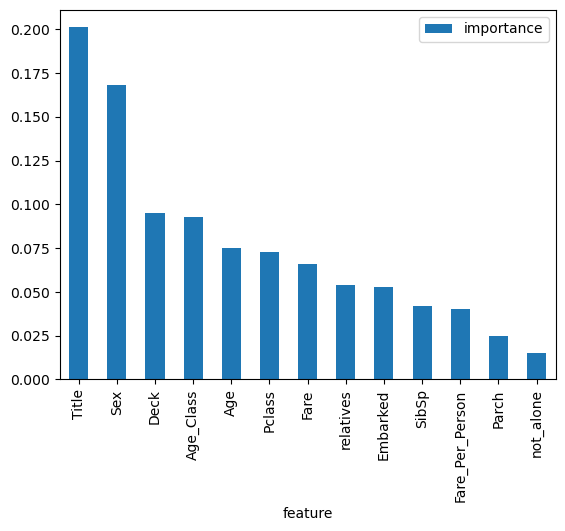

In [47]:
importances.plot.bar()

# Conclusion
Features 'not_alone' and 'Parch' do not play a significant role in the random forest classifiers prediction process. Because of that, we will drop them from the dataset and train the classifier again. We can also remove more or less features.

In [48]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

**Training Random Forest Again**

In [49]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.48 %


**Another way to evaluate a random-forest classifier**
In a Random Forest classifier, out-of-bag (OOB) samples are used for model evaluation without the need for a separate validation set or cross-validation. When constructing each decision tree in the forest, only a subset of the original training data is used for training, leaving some samples unused, known as out-of-bag samples.

The benefit of using out-of-bag samples for evaluation is that it provides an unbiased estimate of the model's performance without the need for a separate validation set. It allows for the efficient use of the entire training dataset for both training and evaluation. This is particularly useful when the dataset is small and cross-validation might not be practical due to computational constraints.

In [50]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.47999999999999 %


# Hyperparameter Tuning
Also known as hyperparameter optimization, is the process of finding the best combination of hyperparameters for a machine learning model to achieve optimal performance. They control various aspects of the model's learning process, such as the complexity of the model, the learning rate, the number of hidden units in a neural network, or the number of trees in a random forest.

In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create the hyperparameters to tune
param_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(3, 10, 1),
    'min_samples_split': np.arange(2, 10, 1),
    'min_samples_leaf': np.arange(1, 5, 1),
}

# Create the random forest classifier
rf = RandomForestClassifier()

# Create the RandomizedSearchCV object
cv = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1)

# Fit the model to the data
cv.fit(X_train, Y_train)

# Print the best parameters
print(cv.best_params_)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


{'n_estimators': 900, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 6}


**Test new parameters**

In [52]:
# Random Forest
random_forest = RandomForestClassifier(criterion="gini",
                                       min_samples_leaf=cv.best_params_['min_samples_leaf'],
                                       min_samples_split=cv.best_params_['min_samples_split'],
                                       n_estimators=cv.best_params_['n_estimators'],
                                       max_depth=cv.best_params_['max_depth'],
                                       oob_score=True,
                                       random_state=1,
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 82.49 %


# Further Evaluation

# Confusion Matrix:
A confusion matrix is a table that is used to evaluate the performance of a classification model. It is a fundamental tool in machine learning for understanding how well the model is making predictions on different classes.

In a binary classification problem (a problem with two classes), the confusion matrix is a 2x2 matrix that shows the counts of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions. The four terms in the confusion matrix have the following meanings:

In [53]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[489,  60],
       [ 91, 251]])

In our confusion matrix:

* True Positive (TP): 486 instances were correctly predicted as positive (Survived) by the model.
* False Positive (FP): 63 instances were incorrectly predicted as positive (Survived) when they were actually negative (Not Survived).
* False Negative (FN): 93 instances were incorrectly predicted as negative (Not Survived) when they were actually positive (Survived).
* True Negative (TN): 249 instances were correctly predicted as negative (Not Survived) by the model.


To interpret this confusion matrix:

* The total number of positive instances (Survived) in the dataset is TP + FN = 486 + 93 = 581.
* The total number of negative instances (Not Survived) in the dataset is TN + FP = 249 + 63 = 312.
* The overall accuracy of the model is (TP + TN) / (TP + TN + FP + FN) = (486 + 249) / (486 + 249 + 63 + 93) =  735 / 891 ≈ 82.45%.

# Precision and Recall
Precision and recall are two important metrics used to evaluate the performance of a classification model, especially in binary classification problems. They are derived from the confusion matrix.

Precision: Precision is the measure of the model's ability to correctly identify positive instances among all the instances predicted as positive. In other words, it represents the proportion of true positive predictions (correctly classified positive instances) out of all positive predictions made by the model. A high precision value indicates that when the model predicts a positive class, it is highly likely to be correct. Precision is particularly relevant in situations where false positives are costly or undesirable, as it measures the ability of the model to avoid making false positive predictions. Precision is calculated as: Precision = TP / (TP + FP)

Recall (Sensitivity or True Positive Rate): Recall is the measure of the model's ability to correctly identify all positive instances among all the actual positive instances in the dataset. In other words, it represents the proportion of true positive predictions out of all actual positive instances in the dataset. A high recall value indicates that the model is effective at capturing most of the positive instances in the dataset. Recall is particularly important in situations where false negatives are costly or dangerous, as it measures the ability of the model to avoid missing positive instances. Recall is calculated as: Recall = TP / (TP + FN)

In [54]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.8070739549839229
Recall: 0.7339181286549707


# F-Score

The F-score, also known as the F1 score, is a metric that combines precision and recall into a single value. It is a way to balance the trade-off between precision and recall in binary classification problems. The F1 score ranges from 0 to 1, where 1 represents a perfect classifier that has both high precision and high recall. A higher F1 score indicates a better overall performance of the model in correctly classifying positive instances while minimizing false positives and false negatives.

The F-score is calculated as the harmonic mean of precision and recall and is defined as follows:

F1 score = 2 * (precision * recall) / (precision + recall)

In [55]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7687595712098009

# Precision Recall Curve
The Precision-Recall (PR) curve is a graphical representation that illustrates the trade-off between precision and recall for different classification thresholds in a binary classification model. It is a useful tool for evaluating and comparing the performance of models, especially in cases where the dataset is imbalanced.

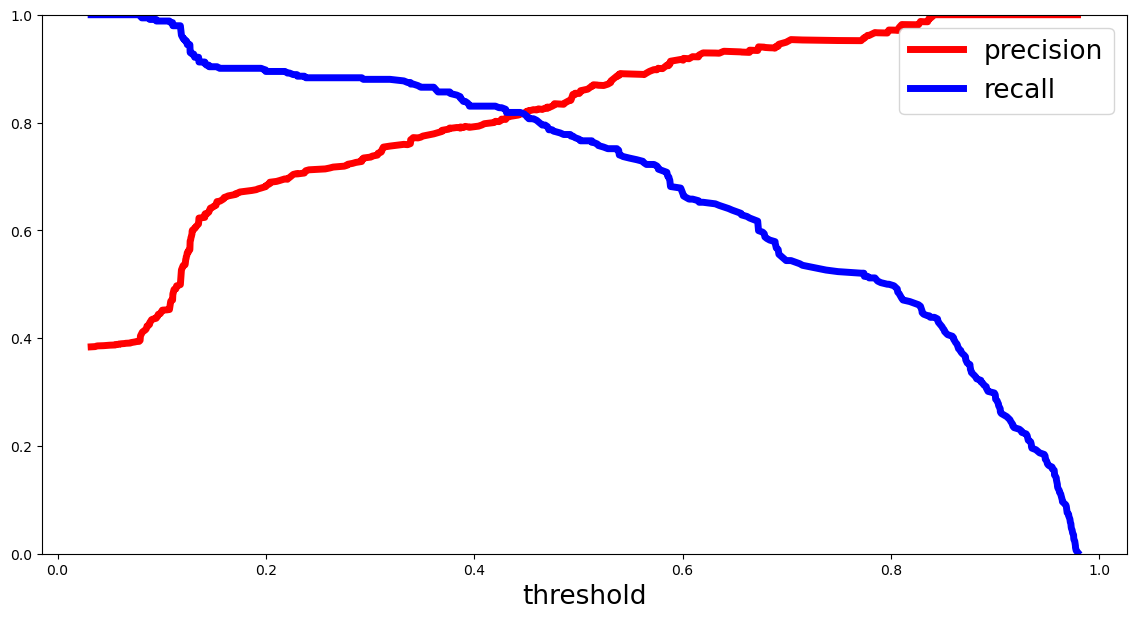

In [56]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = random_forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

Another way is to plot the precision and recall against each other:

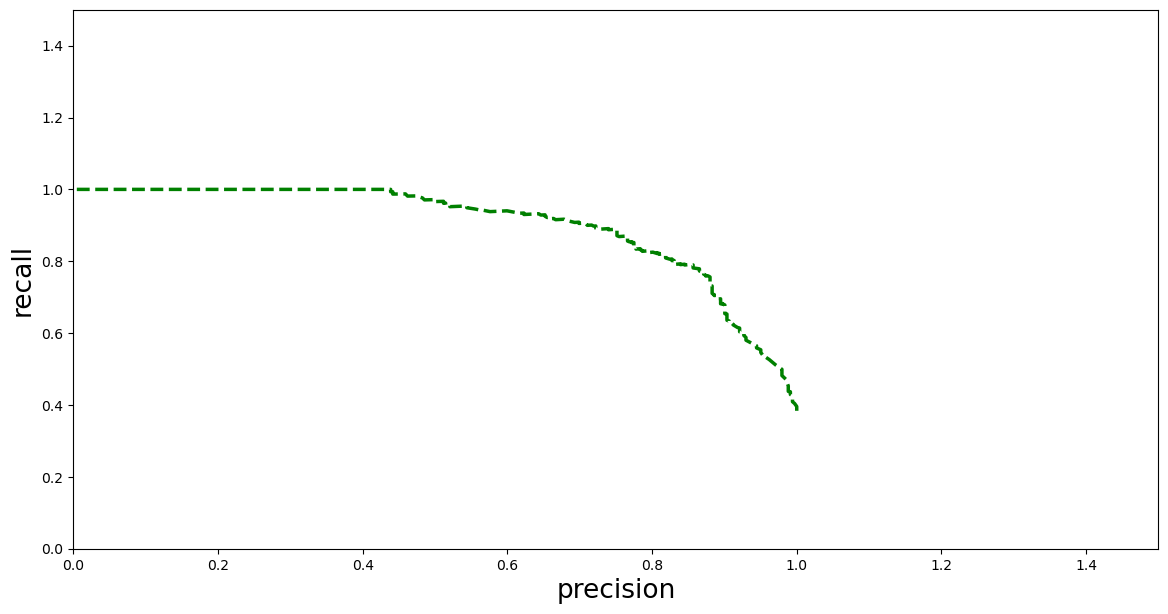

In [57]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

# ROC AUC Curve
The Receiver Operating Characteristic (ROC) curve and the Area Under the ROC Curve (AUC-ROC) are graphical tools used to evaluate the performance of binary classification models.

The ROC curve is created by plotting the True Positive Rate (TPR), also known as sensitivity or recall, on the y-axis against the False Positive Rate (FPR) on the x-axis for different classification thresholds. The TPR is the ratio of true positive predictions to the total number of positive instances in the dataset, and the FPR is the ratio of false positive predictions to the total number of negative instances in the dataset.

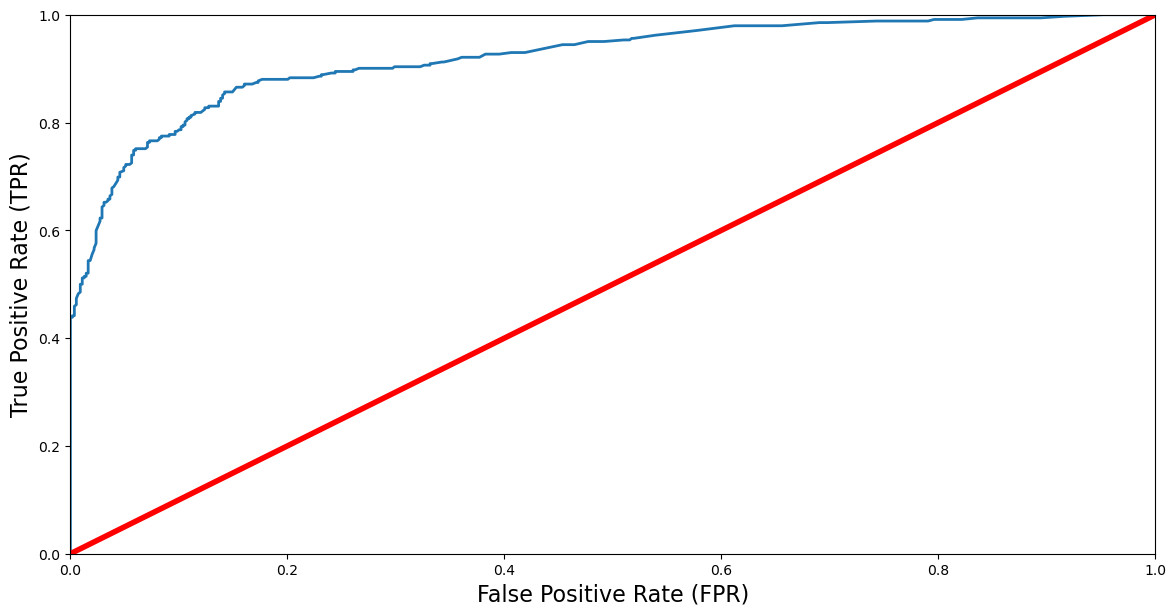

In [58]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

# ROC AUC Score

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) score is a single numeric value that represents the area under the ROC curve. It quantifies the performance of a binary classification model by measuring its ability to distinguish between positive and negative instances across different classification thresholds.

The ROC AUC score ranges between 0 and 1, with higher values indicating better model performance:

* A score of 0.5 suggests a random classifier that performs no better than chance.
* A score close to 1 indicates a strong classifier that can effectively separate positive and negative instances.
* A score below 0.5 suggests a model that performs worse than random and might have the wrong classification orientation (e.g., falsely predicting the opposite class more often).

The ROC AUC score is particularly useful when dealing with imbalanced datasets, where the number of instances in one class is significantly higher than the other. In such cases, accuracy may not be an informative metric, as a classifier could achieve high accuracy by simply predicting the majority class most of the time. The ROC AUC score provides a more robust evaluation of the classifier's performance by taking into account the trade-off between true positive rate (sensitivity) and false positive rate (1-specificity) across different thresholds.

In [59]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(Y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9198542805100183


In [60]:
#Submission
submission = pd.DataFrame(Y_prediction, X_test.index, columns=["Survived"])
submission.to_csv("submission.csv", index_label=["PassengerID"])